# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `2` | `Questions`

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### <font color = "blue"> `IMPORT` your dataset: `bank_loan.csv`. </font>

In [2]:
df = pd.read_csv("bank_loan.csv")

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\790798779.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bank_loan.csv")


### Question 1. Data `Inspection`

#### Question 1.1. How would you look at the first few rows of the DF?

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Question 1.2. How would you look at all the column names?

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Question 2. Data `Wrangling`

#### Question 2.1. How would you check the number of missing values in each column?

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

> There are columns have a large number of missing values 

> Let's clean them first.

#### Question 2.2. How would you find the percentage of missing values in each column? 
> Hint: Use the missing values and divide it by something.

In [6]:
percent_missing = (df.isnull().sum()/len(df.index))*100
percent_missing

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### Question 2.3. How would you remove the columns having more than 90% missing values?

In [7]:
columns_with_missing = df.columns[(df
                                      .isnull()
                                      .sum() / len(df.index)
                                     ) * 100 > 90]

data_cleaned= df.drop(columns_with_missing,
                        axis = 1)

In [8]:
cleaned_datav2 = df.drop(list(percent_missing [percent_missing > 0.90].index),
          axis = 1)

> Let's check the number of missing values again.

In [9]:
data_cleaned.shape

(39717, 55)

In [10]:
cleaned_datav2.shape # should expect the same number of columns cleared but no

(39717, 50)

In [11]:
(data_cleaned
    .isnull()
    .sum() / len(data_cleaned.index)
).sort_values(ascending = False)

mths_since_last_delinq        0.646625
desc                          0.325805
emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
chargeoff_within_12_mths      0.001410
collections_12_mths_ex_med    0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
out_prncp                     0.000000
initial_list_status           0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_acc                     0.000000
total_pymnt_inv               0.000000
recoveries                    0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
pub_rec                       0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
policy_code              

#### Question 2.4. How would you remove columns having more than 30% of missing values?
> Hint: With so **few** columns with more than 30% missing values, can you `drop` them by **name**?

In [12]:
data_cleaned = data_cleaned.drop(["mths_since_last_delinq",
                                  "desc"],
                                 axis = 1)

> Let's check number of missing values again, does all columns have **less than** 90% missing values?

In [13]:
(data_cleaned
    .isnull()
    .sum() / len(data_cleaned.index)
).sort_values(ascending = False)

emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
total_rec_prncp               0.000000
out_prncp                     0.000000
initial_list_status           0.000000
out_prncp_inv                 0.000000
total_acc                     0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
collection_recovery_fee       0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
pub_rec                       0.000000
last_pymnt_amnt               0.000000
policy_code                   0.000000
application_type              0.000000
acc_now_delinq           

#### Question 2.5. How would you check missing values rows-wise, by the way?
> Hint: What does the `axis` argument do?

In [14]:
data_cleaned.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

> How would you check whether some rows have more than 5 missing values

In [15]:
data_cleaned.loc[data_cleaned.isnull().sum(axis = 1)>5,:]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> The column `int_rate` is character type, let's convert it to float.

#### Question 2.6. How would you use `lambda` to convert the data type of `int_rate`?

In [17]:
data_cleaned["int_rate"] = data_cleaned["int_rate"].apply(lambda x: pd.to_numeric(x.split("%")[0])) 
# to strip off its percentage sign

> Let's check the data types again.

In [18]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [19]:
import re

In [20]:
data_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [21]:
data_cleaned["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [22]:
data_cleaned = data_cleaned[~data_cleaned["emp_length"].isnull()] 
# "~" allows us to select all rows that have values in emp_length

In [23]:
data_cleaned["emp_length"] = data_cleaned["emp_length"].apply(lambda x: re.findall("\d+", str(x)
                                                     )[0]
                                )
# \d+ to get digits to concatante the numbers
data_cleaned["emp_length"] = data_cleaned["emp_length"].apply(lambda x: pd.to_numeric(x)
                                                             )

> Let's take a look at type of the columns again

In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

### Question 3. Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [25]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

#### Question 3.1. How would you remove the set of variables from `variables_to_remove` from the dataset?

In [26]:
data_cleaned = data_cleaned.drop(columns = variables_to_remove)

In [27]:
data_cleaned

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


#### Question 3.2. Are there any other variables that we can remove from the dataset also?

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [28]:
data_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [29]:
len(data_cleaned.columns)

32

In [30]:
# remove zip code, address, addr_state, title, purpose 
additional_remove = ["zip_code",
                    "addr_state",
                    "title"]
                    
data_cleaned = data_cleaned.drop(columns = additional_remove)

In [31]:
data_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [32]:
len(data_cleaned.columns)

29

#### Question 3.3. Let's have a look at the target variable--`loan_status`. 

> Objecive: Re-label the values to a `binary form`: namely, `0` or `1`, 
>
> - 1 indicating that the person has defaulted and 
> - 0 otherwise.

But first, what makes up the target variable--`loan_status`?

In [33]:
data_cleaned["loan_status"]

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38642, dtype: object

> You should be able to see that `fully paid` comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Hence, we will have two categories to label as 0 or 1.

- Filter for `Fully Paid` and `Charged Off` 
- Using `lambda`, let's label `Fully Paid` and `Charged Off`

In [34]:
filtered_loan = data_cleaned.loc[(data_cleaned["loan_status"]== "Fully Paid") | (data_cleaned["loan_status"] == "Charged Off") ]

In [35]:
# to check that dataset only contains fully paid and charged off 
print(filtered_loan["loan_status"].unique())

['Fully Paid' 'Charged Off']


In [36]:
filtered_loan["loan_status"]

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 37544, dtype: object

In [37]:
mymap = {"Fully Paid": 0 , "Charged Off" : 1}
filtered_loan["loan_status"] = filtered_loan["loan_status"].apply(lambda x: mymap.get(x) if x in mymap else x)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\1282459148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["loan_status"] = filtered_loan["loan_status"].apply(lambda x: mymap.get(x) if x in mymap else x)


> Let's convert `loan_status` to **integer data type** (again, use `lambda`).

> Let's take a look at the data points under the `loan_status` category.

In [38]:
filtered_loan["loan_status"]

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 37544, dtype: int64

### Question 4. A Simple Univariate Analysis

> First, let's look at the overall default rate.

#### Question 4.1. How would you calculate default rate? Please use `numpy` module.

In [39]:
a = filtered_loan["loan_status"].mean()
print ("The overall default rate is about " +str(round(a*100)) + " %")
# How to use the numpy module to find the default rate? or did i interpret the qn wrongly

The overall default rate is about 14 %


> The overall default rate is about `??%`.  

> Let's visualize default rates across grade of the loan.

In [40]:
filtered_loan["grade"]

0        B
1        C
2        C
3        C
5        A
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 37544, dtype: object

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

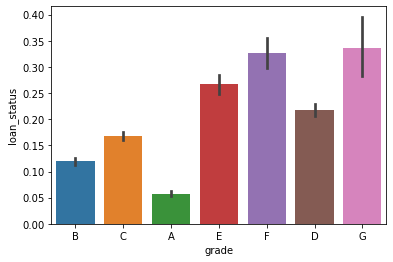

In [41]:
import seaborn as sns 
sns.barplot(x = "grade",y="loan_status", data = filtered_loan)

#### Question 4.2. Create a function to plot `loan_status` across `any categorical variable`.
> Hint: How did you visualise in Question 4.1? Is there a way to generalise what you did for `any categorical variable`?

In [42]:
def plot_loan_status(z):
    return sns.barplot(x = z, y="loan_status", data = filtered_loan)
    z.apply(plot_loan_status)

In [128]:
def default_by_group(df, group, label="loan_status"):
    return df.groupby(group)[label].mean()


#### How's default rates across `grade` of loan? Use your newly created function :)

In [129]:
default_by_group(filtered_loan,"grade")

grade
A    0.057764
B    0.119289
C    0.167949
D    0.217915
E    0.267176
F    0.326382
G    0.335570
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

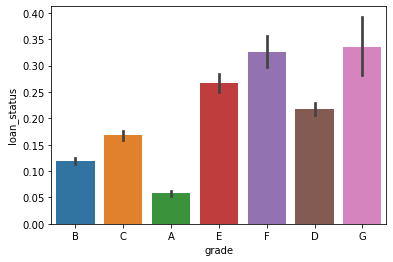

In [43]:
plot_loan_status("grade")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**


As the grade goes from A to G, the probability of default increases

#### `term`

<AxesSubplot:xlabel='term', ylabel='loan_status'>

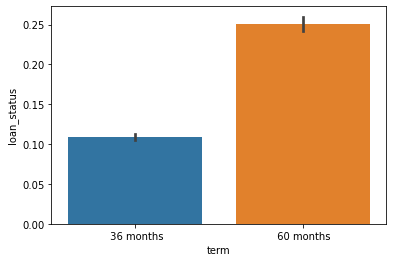

In [44]:
plot_loan_status("term")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### `home_ownership`

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

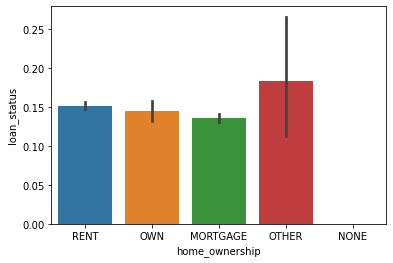

In [45]:
plot_loan_status("home_ownership")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Home Ownership does not have any impact on loan_status

#### The role of `verification_status`?

<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

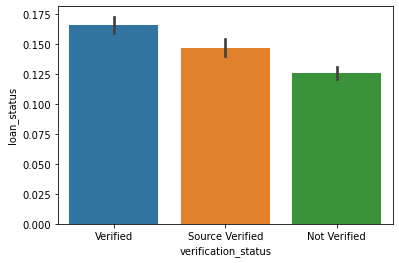

In [46]:
plot_loan_status("verification_status")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### The role of Loan `purpose`?

In [47]:
filtered_loan['purpose']

0               credit_card
1                       car
2            small_business
3                     other
5                   wedding
                ...        
39712      home_improvement
39713           credit_card
39714    debt_consolidation
39715                 other
39716    debt_consolidation
Name: purpose, Length: 37544, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

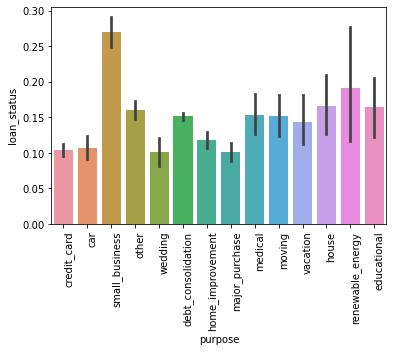

In [48]:
plot_loan_status("purpose")
plt.xticks(rotation=90, ha='left')
# how to fit all the parameters into the graph?

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### Question 4.3. How is the distribution of loans across time?

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [49]:
import datetime as dt 
filtered_loan["issue_d"] = pd.to_datetime(filtered_loan["issue_d"].str.upper(), format='%b-%y', yearfirst=False)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\3609658535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["issue_d"] = pd.to_datetime(filtered_loan["issue_d"].str.upper(), format='%b-%y', yearfirst=False)


In [50]:
filtered_loan["issue_d"].dt.year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_d, Length: 37544, dtype: int64

In [51]:
filtered_loan["issue_d"].dt.month

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_d, Length: 37544, dtype: int64

> Yes, please use `lambda`.

In [52]:
row = filtered_loan["issue_d"][0]

lambda row: row.year

filtered_loan["year"] = filtered_loan["issue_d"].apply(lambda row: row.year)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\694610127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["year"] = filtered_loan["issue_d"].apply(lambda row: row.year)


> Please extract month and year from `issue_d`, using `lambda`.

In [53]:
row = filtered_loan["issue_d"][0]

lambda row: row.month

filtered_loan["month"] = filtered_loan["issue_d"].apply(lambda row: row.month)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\4184323350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["month"] = filtered_loan["issue_d"].apply(lambda row: row.month)


> How would you examine the number of loans granted across `years`?

In [54]:
filtered_loan["year"].value_counts()

2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

<AxesSubplot:>

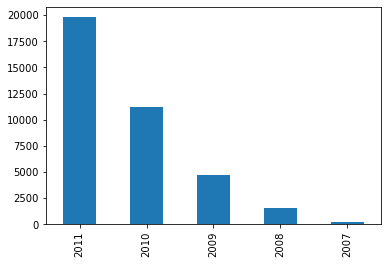

In [55]:
filtered_loan.year.value_counts().sort_index(ascending=False).plot(kind='bar')

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

<AxesSubplot:>

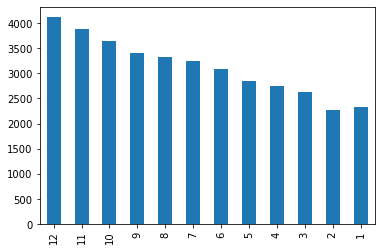

In [56]:
filtered_loan.month.value_counts().sort_index(ascending=False).plot(kind='bar')

`Interpretation`?

#### Compare the default rates across years.

<AxesSubplot:xlabel='year', ylabel='loan_status'>

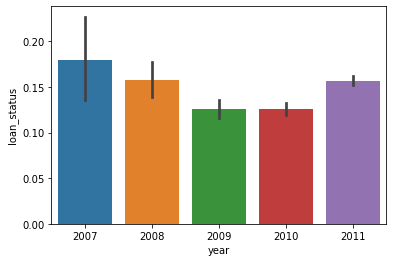

In [57]:
plot_loan_status("year")

> `Interpretation`?

#### Let's compare default rates across months.

<AxesSubplot:xlabel='month', ylabel='loan_status'>

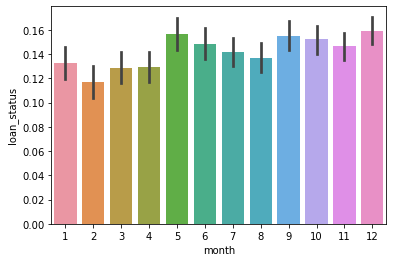

In [58]:
plot_loan_status("month")

> `Interpretation`? 

#### Question 4.4. Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

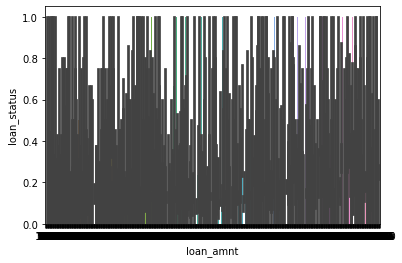

In [59]:
plot_loan_status("loan_amnt")

> `Interpretation`?

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [60]:
filtered_loan["loan_amnt"]

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

In [61]:
def categorize_loan(row):
    if row < 5000:
        return "low"
    elif row <15000:
        return "medium"
    elif row < 25000:
        return "high"
    else:
        return "very high"
filtered_loan["loan_amnt_class"] = filtered_loan["loan_amnt"].apply(categorize_loan)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\1469214823.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["loan_amnt_class"] = filtered_loan["loan_amnt"].apply(categorize_loan)


> Let's compare the default rates across loan amount type

<AxesSubplot:xlabel='loan_amnt_class', ylabel='loan_status'>

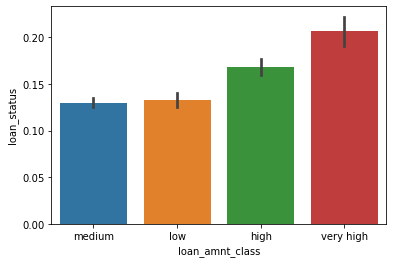

In [62]:
plot_loan_status("loan_amnt_class")

> `Interpretation`?

#### Let's also convert funded amount invested to bins (using the same scheme from `loan_amount`)

In [63]:
def categorize_fund_loan(row):
    if row < 5000:
        return "low"
    elif row <15000:
        return "medium"
    elif row < 25000:
        return "high"
    else:
        return "very high"
filtered_loan["funded_amnt_class"] = filtered_loan["funded_amnt"].apply(categorize_fund_loan)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\4287358315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["funded_amnt_class"] = filtered_loan["funded_amnt"].apply(categorize_fund_loan)


> Visualize the results

<AxesSubplot:xlabel='funded_amnt_class', ylabel='loan_status'>

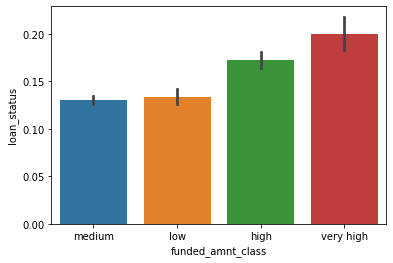

In [64]:
plot_loan_status("funded_amnt_class") # data is wrong

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new categorical variable.

In [65]:
func_int_rate = lambda x:("low" if x <= 10 else("medium" if x <= 15 else "high"))

> Let's compare default rates across rates of interest

In [66]:
filtered_loan["int_rate_class"] = filtered_loan["int_rate"].apply(func_int_rate)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\1104339644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["int_rate_class"] = filtered_loan["int_rate"].apply(func_int_rate)


<AxesSubplot:xlabel='int_rate_class', ylabel='loan_status'>

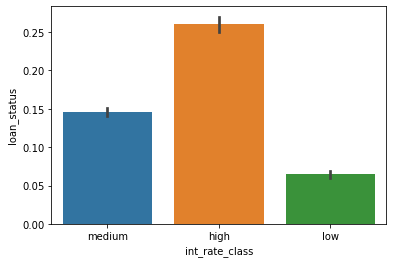

In [67]:
plot_loan_status("int_rate_class")

> `Interpretaion`?

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [68]:
func_dti_rate = lambda x:("low" if x <= 10 else("medium" if x <= 20  else "high"))

> Let's comparing default rates across debt to income ratio

In [69]:
filtered_loan["dti_rate_class"] = filtered_loan["dti"].apply(func_int_rate)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\1382406142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["dti_rate_class"] = filtered_loan["dti"].apply(func_int_rate)


<AxesSubplot:xlabel='dti_rate_class', ylabel='loan_status'>

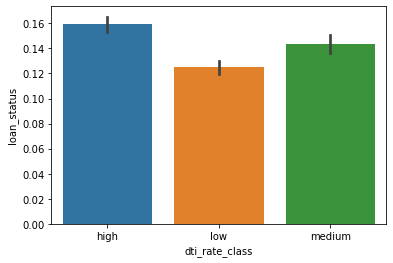

In [70]:
plot_loan_status("dti_rate_class")

> `Interpretation`?

#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [71]:
func_fund_rate = lambda x:("low" if x <= 5000 else("medium" if x <= 15000 else "high"))

#### `installment`

In [72]:
filtered_loan["fund_rate_class"] = filtered_loan["funded_amnt"].apply(func_fund_rate)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\2280525395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["fund_rate_class"] = filtered_loan["funded_amnt"].apply(func_fund_rate)


<AxesSubplot:xlabel='fund_rate_class', ylabel='loan_status'>

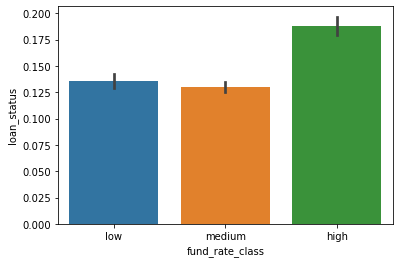

In [73]:
plot_loan_status("fund_rate_class")

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [74]:
func_instal_rate = lambda x:("low" if x <= 200 else("medium" if x <= 400 else("high" if x <= 600 else "very high")))

> Let's compare default rates across installment

In [75]:
filtered_loan["installment_class"] = filtered_loan["installment"].apply(func_instal_rate)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\3330767820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["installment_class"] = filtered_loan["installment"].apply(func_instal_rate)


<AxesSubplot:xlabel='installment_class', ylabel='loan_status'>

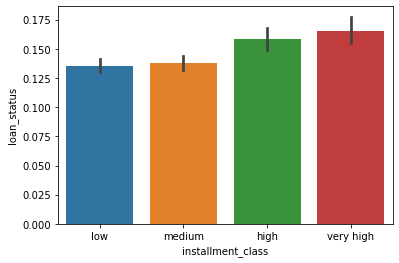

In [76]:
plot_loan_status("installment_class")

> `Interpretation`?

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [77]:
func_annual_income = lambda x:("low" if x <= 50000 else("medium" if x <= 100000 else("high" if x <= 150000 else "very high")))

> Visualize the results.

In [78]:
filtered_loan["annual_income_class"] = filtered_loan["annual_inc"].apply(func_annual_income)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\2544648588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["annual_income_class"] = filtered_loan["annual_inc"].apply(func_annual_income)


<AxesSubplot:xlabel='annual_income_class', ylabel='loan_status'>

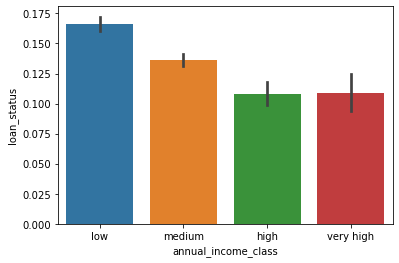

In [79]:
plot_loan_status("annual_income_class")

> What's your interpretation?

#### `Employment Length`

> First, let's drop the missing value observations in `emp_length`

In [80]:
filtered_loan["emp_length"].isna().any()

False

> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [81]:
func_emp_length = lambda x:("fresher" if x <= 1 else("junior" if x <= 3 else("senior" if x <= 7 else "expert")))

> Visualize the results

In [82]:
filtered_loan["emp_length_class"] = filtered_loan["emp_length"].apply(func_emp_length)

C:\Users\cassi\AppData\Local\Temp\ipykernel_3300\3598516091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan["emp_length_class"] = filtered_loan["emp_length"].apply(func_emp_length)


<AxesSubplot:xlabel='emp_length_class', ylabel='loan_status'>

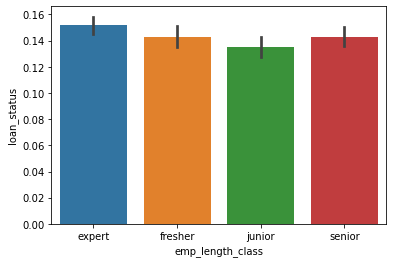

In [83]:
plot_loan_status("emp_length_class")

> What's your `interetation`?

### Question 5. Segmented Univariate Analysis



#### Question 5.1. A quick glance on Loan Purpose (`purpose`) using your first function :)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

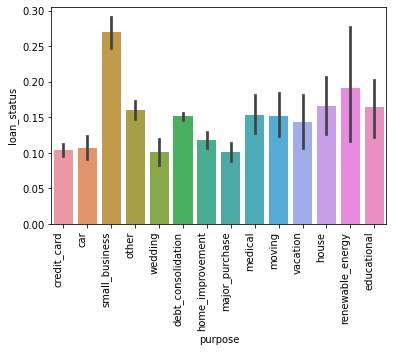

In [84]:
plot_loan_status("purpose")
plt.xticks(rotation=90, ha='right')

`Interpretation`?

#### Question 5.2. Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

In [85]:
filtered_loan.groupby("purpose")["loan_status"].count()

purpose
car                    1448
credit_card            4899
debt_consolidation    17675
educational             317
home_improvement       2785
house                   354
major_purchase         2080
medical                 656
moving                  552
other                  3713
renewable_energy         94
small_business         1710
vacation                348
wedding                 913
Name: loan_status, dtype: int64

> Please analyze the top 4 types of loans based on purpose

#### Let's filter the df for the 4 types of loans mentioned above

In [94]:
top_4_loan = filtered_loan.groupby("purpose")["loan_status"].count().sort_values(ascending = False).head(4)
top_4_loan

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
Name: loan_status, dtype: int64

#### Visualize the number of loans by purpose 

<AxesSubplot:title={'center':'Number of loans by purpose'}, xlabel='Purpose', ylabel='Frequency'>

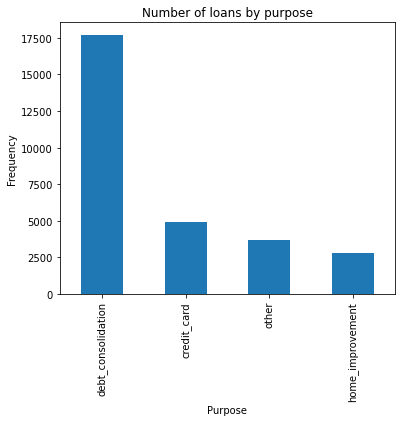

In [96]:
top_4_loan.plot(kind='bar', title='Number of loans by purpose', ylabel='Frequency',
         xlabel='Purpose', figsize=(6, 5))

> let's now compare the default rates (`loan_status`) across two types of categorical variables;
> - `purpose` of loan (constant)
> - another categorical variable (which changes)

In [97]:
filtered_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37544 non-null  int64         
 1   member_id                   37544 non-null  int64         
 2   loan_amnt                   37544 non-null  int64         
 3   funded_amnt                 37544 non-null  int64         
 4   funded_amnt_inv             37544 non-null  float64       
 5   term                        37544 non-null  object        
 6   int_rate                    37544 non-null  float64       
 7   installment                 37544 non-null  float64       
 8   grade                       37544 non-null  object        
 9   sub_grade                   37544 non-null  object        
 10  emp_title                   36136 non-null  object        
 11  emp_length                  37544 non-null  int64     

In [101]:
test_data = filtered_loan.groupby(["purpose","fund_rate_class"]).loan_status.mean()
test_data

purpose             fund_rate_class
car                 high               0.174603
                    low                0.104430
                    medium             0.103586
credit_card         high               0.140367
                    low                0.082063
                    medium             0.097091
debt_consolidation  high               0.189648
                    low                0.148565
                    medium             0.134483
educational         high               0.227273
                    low                0.133758
                    medium             0.188406
home_improvement    high               0.145937
                    low                0.107191
                    medium             0.112803
house               high               0.157303
                    low                0.174603
                    medium             0.168317
major_purchase      high               0.164319
                    low                0.089862
    

In [102]:
test_data=test_data.unstack(level = -1)
test_data
# read up on unstack

fund_rate_class,high,low,medium
purpose,,,
car,0.174603,0.104430,0.103586
credit_card,0.140367,0.082063,0.097091
debt_consolidation,0.189648,0.148565,0.134483
educational,0.227273,0.133758,0.188406
home_improvement,0.145937,0.107191,0.112803
house,0.157303,0.174603,0.168317
major_purchase,0.164319,0.089862,0.098098
medical,0.194444,0.142336,0.154839
moving,0.150000,0.164038,0.133333


> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please **create your function** named `plot_segmented`

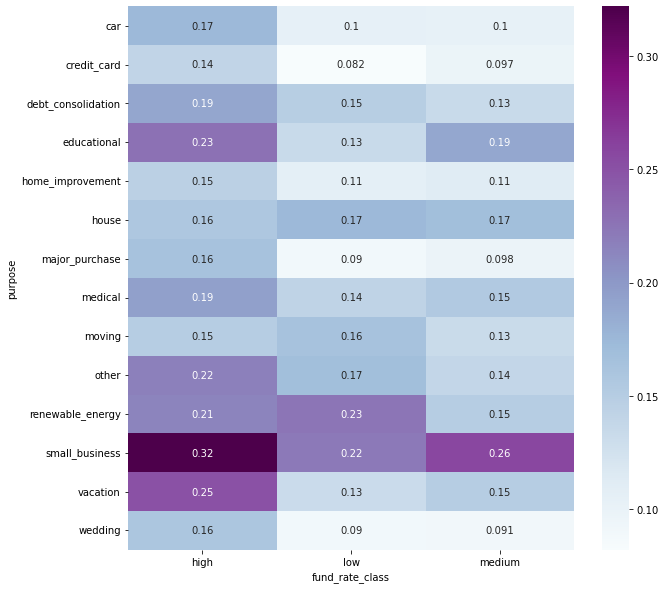

In [104]:
fig, ax = plt.subplots(figsize=(10,10))   # Sample figsize in inches
ax = sns.heatmap(test_data,annot=True,cmap='BuPu')

> Let's use the function to see if there's differences in the term.

In [105]:
def plot_segmented(x):
    fig, ax = plt.subplots(figsize=(10,10)) 
    sns.heatmap(x,annot= True, cmap = "BuPu")

#### Grade of Loan (`grade`)

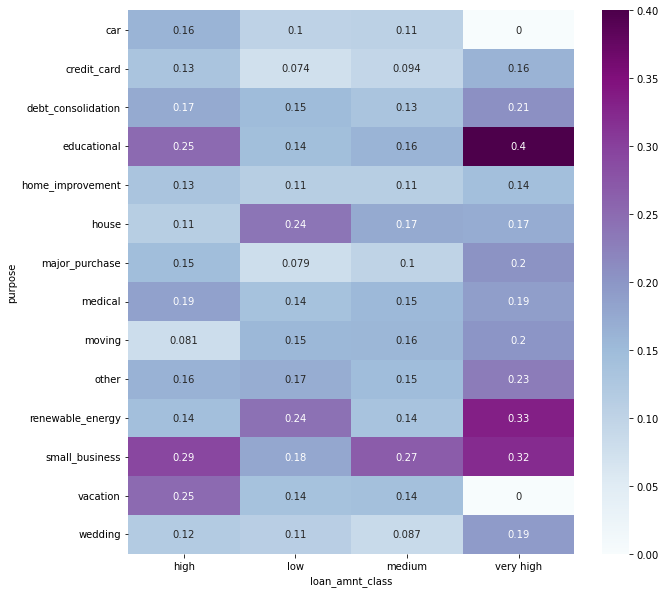

In [107]:
test_data1 = filtered_loan.groupby(["purpose","loan_amnt_class"]).loan_status.mean()
test_data1=test_data1.unstack(level = -1)
plot_segmented(test_data1)

#### home ownership(`home_ownership`)

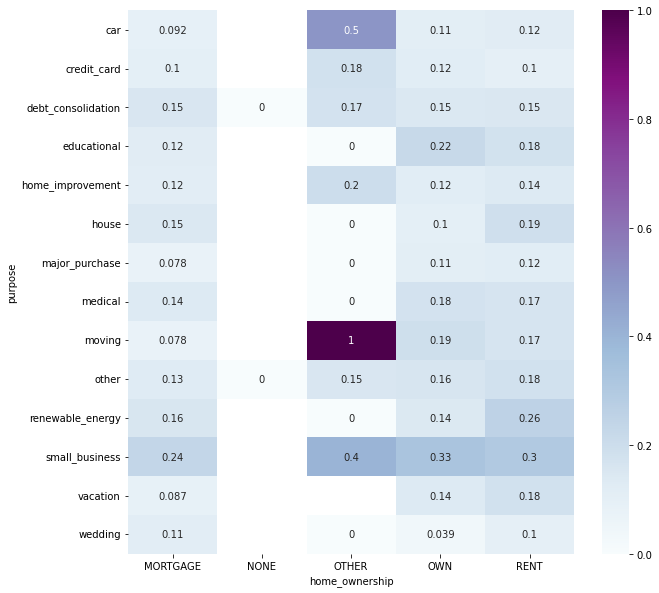

In [108]:
test_data2 = filtered_loan.groupby(["purpose","home_ownership"]).loan_status.mean()
test_data2=test_data2.unstack(level = -1)
plot_segmented(test_data2)

#### `year`

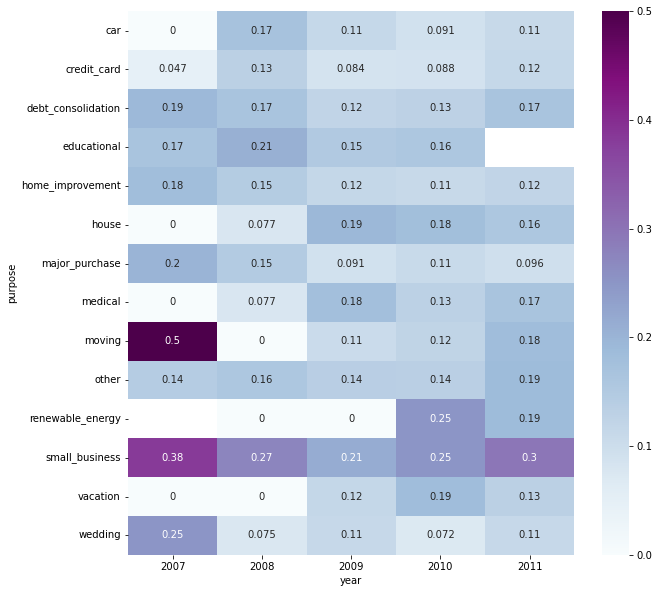

In [109]:
test_data3 = filtered_loan.groupby(["purpose","year"]).loan_status.mean()
test_data3=test_data3.unstack(level = -1)
plot_segmented(test_data3)

#### `emp_length`

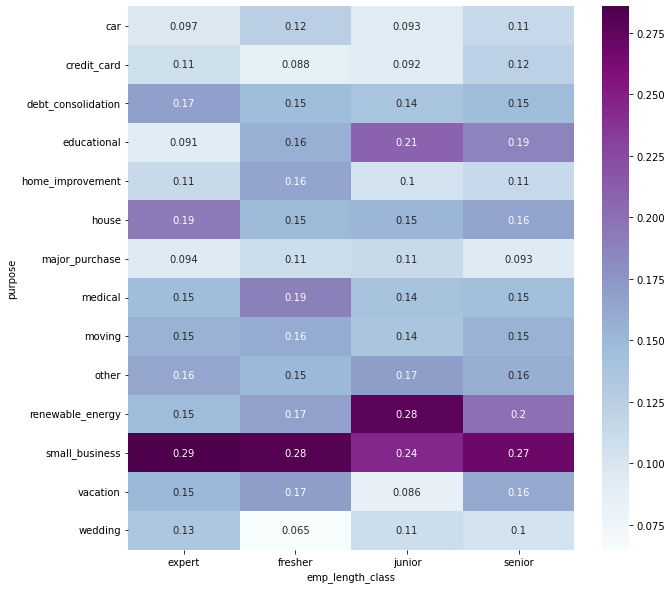

In [112]:
test_data4 = filtered_loan.groupby(["purpose","emp_length_class"]).loan_status.mean()
test_data4=test_data4.unstack(level = -1)
plot_segmented(test_data4)

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

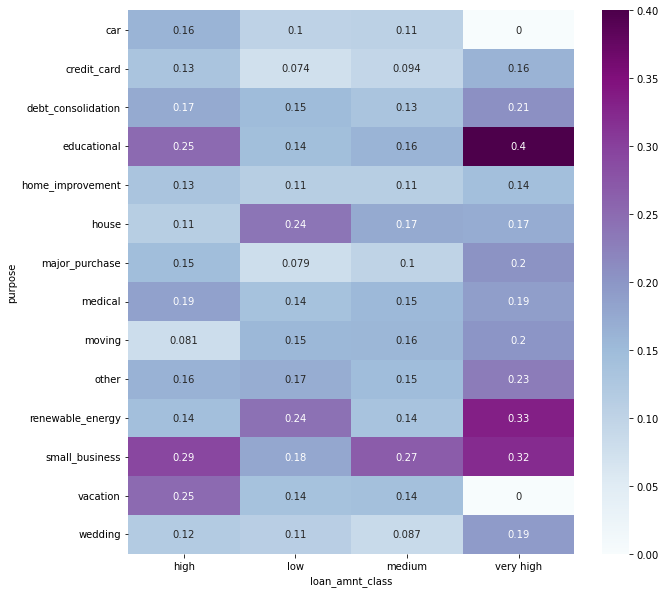

In [113]:
test_data5 = filtered_loan.groupby(["purpose","loan_amnt_class"]).loan_status.mean()
test_data5=test_data5.unstack(level = -1)
plot_segmented(test_data5)

> interest rate (`int_rate`)

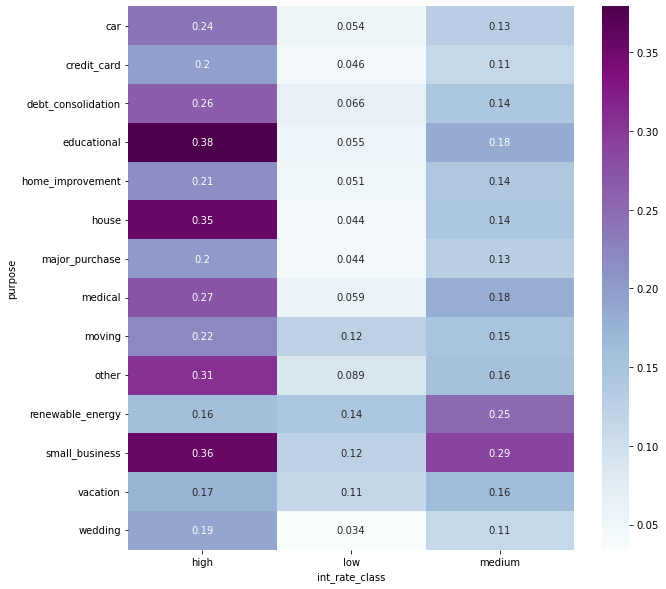

In [114]:
test_data6 = filtered_loan.groupby(["purpose","int_rate_class"]).loan_status.mean()
test_data6=test_data6.unstack(level = -1)
plot_segmented(test_data6)

> `installment`

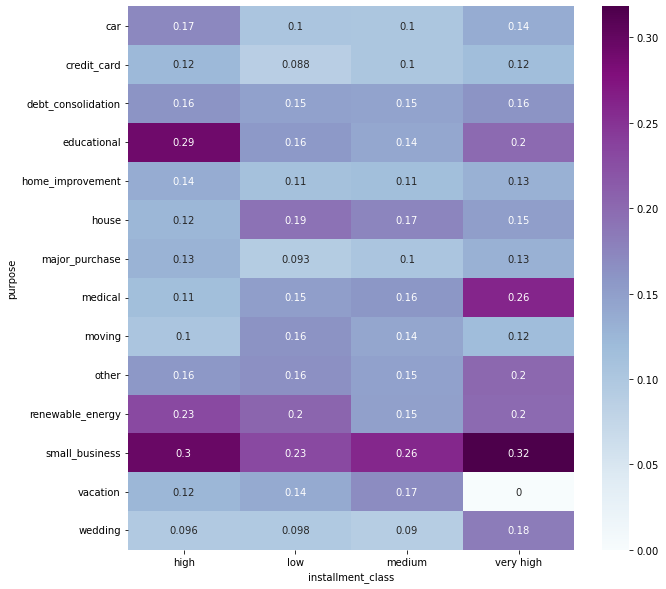

In [115]:
test_data7 = filtered_loan.groupby(["purpose","installment_class"]).loan_status.mean()
test_data7=test_data7.unstack(level = -1)
plot_segmented(test_data7)

> debt-to-income (`dti`) ratio

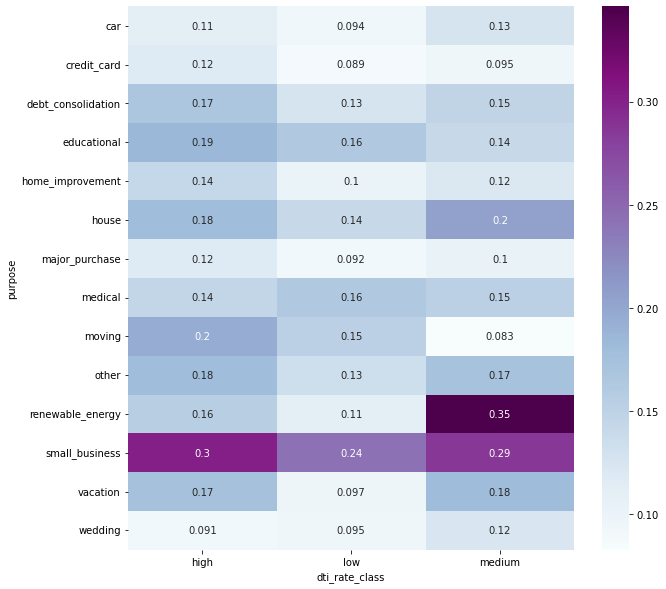

In [116]:
test_data8 = filtered_loan.groupby(["purpose","dti_rate_class"]).loan_status.mean()
test_data8=test_data8.unstack(level = -1)
plot_segmented(test_data8)

> Let's have a look at the role of `annual_income`

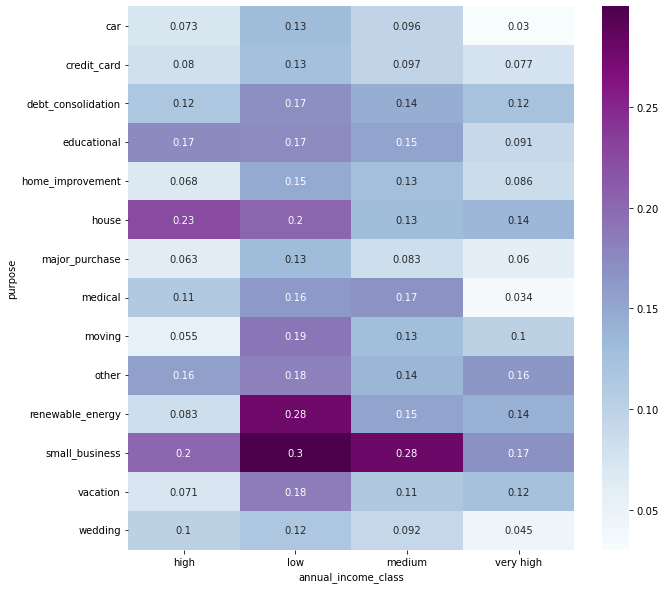

In [119]:
test_data9 = filtered_loan.groupby(["purpose","annual_income_class"]).loan_status.mean()
test_data9=test_data9.unstack(level = -1)
plot_segmented(test_data9)
#spearman rank prder correlation (for real world)

> A good way to quantify the effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

In [ ]:
# not sure what you meant, prof 

#### Question 5.3 Write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the variable on default rate.

> Please create your own function named `diff_rate`.

In [120]:
filtered_loan.groupby(["purpose","annual_income_class"]).loan_status.mean().max()
# answer diff

0.29982964224872233

> Please use the function and draw some insights :)

In [123]:
def diff_rate (a,b):
    a = a.max()
    b = b.min()
    return a-b


In [135]:
diff_rate(default_by_group(filtered_loan,"annual_inc"),default_by_group(filtered_loan,"annual_inc"))

1.0

> Thus, there is a ***`??%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

### Variables in the Dataset

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>